# Exercise 08.1

In the following exercise we implement the Metropolis algorithm in order to sample the modulus squared of a trial wavefunction used to approximate the ground state of a non analytically solvable quantum system.  
The system hamiltonian is: $$ H = \frac{p^2}{2m} + x^4 - \frac{5}{2}x^2 $$
In the following, we will put $\hbar=m=1$.  
We will suppose the approximated ground state has the following wave function: 
$$ \Psi_T(x) = N \left(e^{-\frac{(x+\mu)^2}{2\sigma^2}} +  e^{-\frac{(x-\mu)^2}{2\sigma^2}} \right)$$ 
which is chosen because of its symmetry under parity. $\mu$ and $\sigma$ are tunable parameters. The expected value of the hamiltonian is:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Which is computed by sampling the function $ \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} $ with the Metropolis algorithm, performing in fact an importance sampling. Notice that, since the Metropolis algorithm requires only to compute the ratio between probabilities and that the function to integrate $ \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} $ is independent on the normalization, the actual computation of the factor $N$ is not required.

# Exercise 08.2

In this excersice we use the simulated annealing (SA) technique to find the values of $\mu$ and $\sigma$ that minimize the value of $ \langle \hat{H}_T \rangle $, finding in this way the best approximation to the true ground state that our family of trial wavefunctions can provide.

## Simulated annealing

SA is a MC optimization technique that exploits the analogy of an optimization process with the cooling down of a physical system.  
Suppose that our goal is to find the minimum of a cost functon $L(k)$, where $k$ is a set of parameters. (In our case, $L = \langle \hat{H}_T \rangle (\mu, \sigma)$).  
The key idea is to consider a thermodynamical system whose hamiltonian is $L(k)$ and to simulated its evolution in the canonical ensemble via Metropolis algorithm. Such system is at thermal equilibrium with a bath at inverse temperature $\beta=\frac{1}{T}$.  
We consider a starting temperature $T$ high enough (i.e. $\beta L << 1$, where $L$ is the typical scale of $L(k)$) such that the evolution of the system is ergodic.
Then, we cool off the system slowly, such that the transition probability to a state with higher energy becomes progressively less likely. In this way, as temperature is decreased, the system will become trapped in the global minimum, and then the optimization is complete.  
The key to the correct success of the algorithm convergence is the slowness of the cooling process: if temperature is let fall rapidly, the system could get trapped in a local minimum and thus the optimal value would not be found.

## Starting temperature and decreasing law

We choose as starting temperature $T_0 = 2 $, since the typical scale of the energy of the system is within the unity.  
The temperature law is chosen to have vanishing derivative at $t=0$ and then to reach rapidly low values of temperature. It is:
$$ T(t) = (t+2)e^{-\frac{t}{2}} $$
Sampled for $t \in \{1, 2, ..., 20\}$.

## Simulation parameters
The computation of $\langle {\hat H} \rangle_T$ is performed by usual data-blocking technique, with $N=100$ blocks of $L=1000$ steps each, that provide an estimation of $\langle {\hat H} \rangle_T$ with a relative error in the range between $1 \%$ and $10 \%$.  
The SA algorithm requires no data blocking, since we are not interested in the ensemble average of $\langle {\hat H} \rangle_T$ in the parameter space, but only its value given the values of $\mu$ and $\sigma$.  
For every temperature, $n = 1000$ MC steps are performed, and the final configurations $\mu$ and $\sigma$ of each temperature are set as initial configuration of the next temperature in the cycle. The results are shown in figures.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# load parameters for annealing simulation
nsteps_an  = np.loadtxt("INPUT/annealing_input.dat", usecols=1, skiprows=3, max_rows=1)
steps = [i for i in range(int(nsteps_an))]

In [3]:
temps = [(i+2.0)*np.exp(-0.5*i) for i in range(21)]

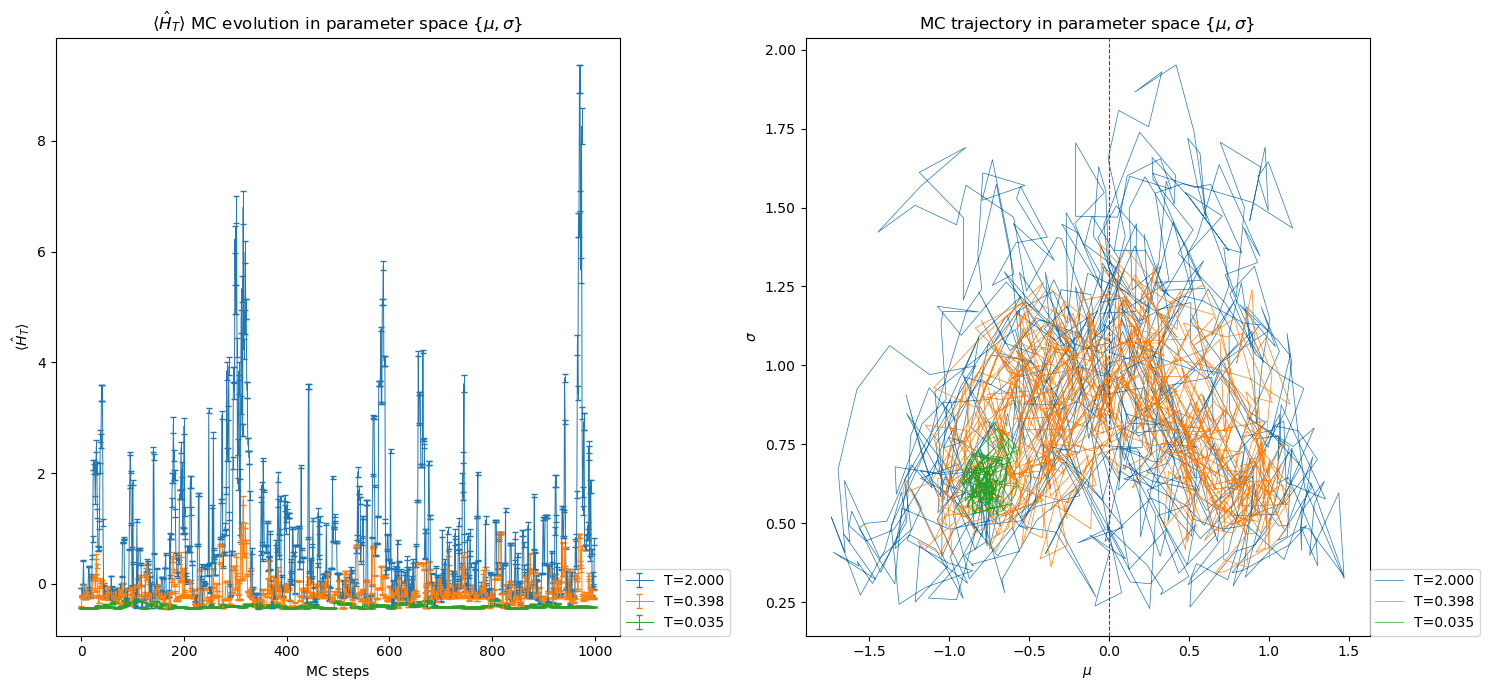

In [5]:
# Create a figure with two subplots arranged side by side
fig, axx = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)

# Define a subset of temperatures to be used for the plots
temps_cut = [temps[0], temps[6], temps[12]]

# Get the first subplot axis
ax_1 = axx[0]

# Loop through the selected temperatures
for temp in temps_cut:
    # Load energies and errors from the corresponding file for the given temperature
    energies, errors = np.loadtxt(f"T={format(temp, '.3f')}/annealing_energy.dat", usecols=(2, 3), skiprows=1, unpack=True)
    
    # Plot the energies with error bars
    ax_1.errorbar(steps, energies, yerr=errors, capsize=2.5, label=f"T={format(temp, '.3f')}", linewidth=0.7)

# Set the title and labels for the first subplot
ax_1.set_title(r"$\langle \hat{H}_T \rangle$ MC evolution in parameter space $\{ \mu, \sigma \}$")
ax_1.set_xlabel("MC steps")
ax_1.set_ylabel(r"$\langle \hat{H}_T \rangle$")
ax_1.legend(loc=(1, 0))  # Place legend outside the plot area to the right

# Get the second subplot axis
ax_2 = axx[1]

# Loop through the selected temperatures
for temp in temps_cut:
    # Load mu and sigma values from the corresponding file for the given temperature
    mu, sigma = np.loadtxt(f"T={format(temp, '.3f')}/annealing_energy.dat", usecols=(0, 1), skiprows=1, unpack=True)
    
    # Plot mu vs sigma
    ax_2.plot(mu, sigma, label=f"T={format(temp, '.3f')}", linewidth=0.5)

# Add a vertical line at mu=0 for reference
ax_2.axvline(x=0., linestyle='--', color='r', linewidth=0.8)

# Set the title and labels for the second subplot
ax_2.set_title(r"MC trajectory in parameter space $\{ \mu, \sigma \}$")
ax_2.set_xlabel("$\mu$")
ax_2.set_ylabel(r"$\sigma$")
ax_2.legend(loc=(1, 0))  # Place legend outside the plot area to the right

We notice how by decreasing the temperature, the energy fluctuations become smaller and smaller, because the system converges to the global minimum.  
The trajectory in parameter space shows clearly how the system at high temperatures explores parameter space ergodically and then becomes way more localized as temperature decreases.  
Notice how the trajectory is symmetric with respect to $\mu$, because $\langle \hat{H}_T \rangle (\mu, \sigma) = \langle \hat{H}_T \rangle (-\mu,\sigma)$.

## Optimal approximated ground state energy
SA provides with the following optimal parameters: $\mu = 0.793$ and $\sigma = 0.632$  
The approximated ground state energy given by these parameters is shown in figure below. As before, averages and uncertaintes are computed by means of data blocking technique, with same parameters as before.

In [6]:
#load simulation parameters
mu = np.loadtxt("OPTIMIZED/output.dat", usecols=2, skiprows=0, max_rows=1, unpack=True)
sigma = np.loadtxt("OPTIMIZED/output.dat", usecols=2, skiprows=1, max_rows=1, unpack=True)
nblocks = np.loadtxt("OPTIMIZED/output.dat", usecols=2, skiprows=3, max_rows=1, unpack=True)
nsteps = np.loadtxt("OPTIMIZED/output.dat", usecols=2, skiprows=4, max_rows=1, unpack=True)

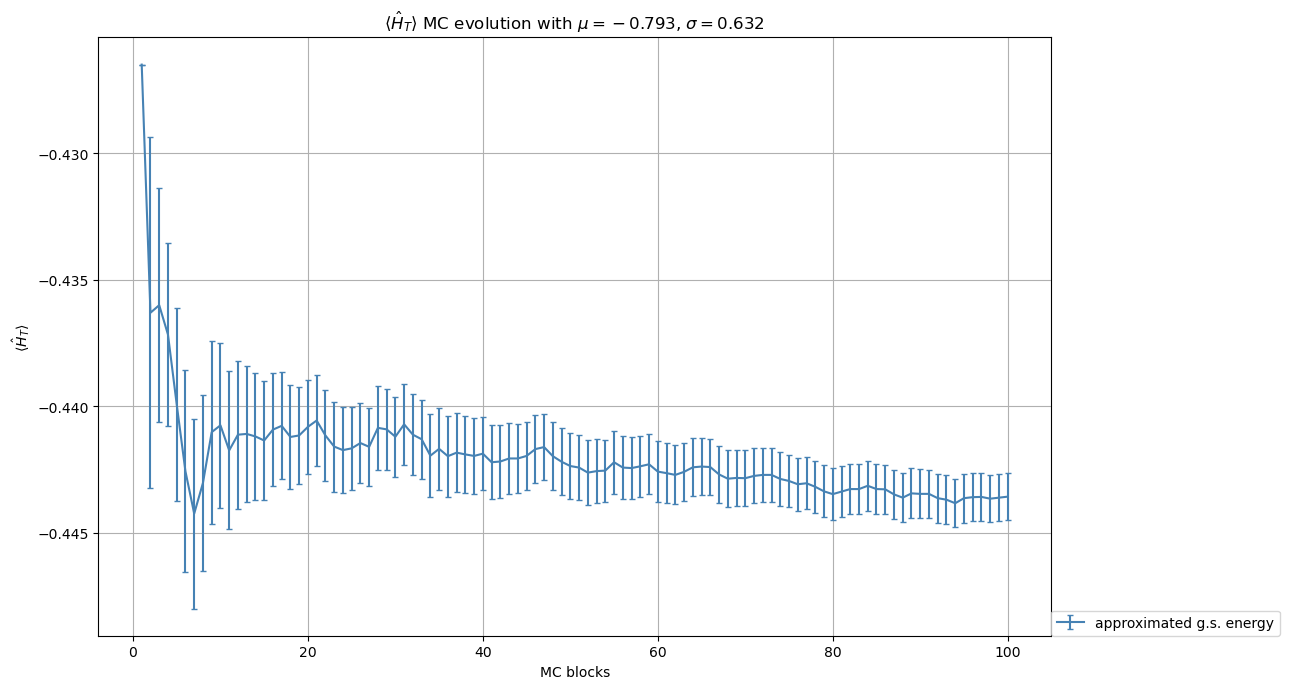

In [7]:
# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(13, 7), tight_layout=True)

# Load data from the file "OPTIMIZED/energy.dat"
# The file is assumed to contain data with columns: blocks, some unused column, data, error
blocks, data, err = np.loadtxt("OPTIMIZED/energy.dat", usecols=(0, 2, 3), skiprows=1, unpack=True)

# Enable grid on the plot
ax.grid(True)

# Plot the energy data with error bars
ax.errorbar(blocks, data, yerr=err, capsize=2.5, color="steelblue", label="approximated g.s. energy")

# Set the title of the plot, dynamically including the optimized parameters mu and sigma
ax.set_title(r"$\langle \hat{H}_T \rangle$ MC evolution with " + f"$\mu={format(mu, '.3f')}$, $\sigma={format(sigma, '.3f')} $")

# Set the x-axis label
ax.set_xlabel("MC blocks")

# Set the y-axis label
ax.set_ylabel(r"$\langle \hat{H}_T \rangle$")

# Add a legend to the plot, placed outside the plot area to the right
ax.legend(loc=(1, 0.))

The approximated ground state energy is greater then the true $E_0$ computed by diagonalizing the discretized Schrodinger equation, as it should be, since no state can have expectation value of energy greater than the ground state one.

## Probability distributions comparison

Here we compare the true ground state probability density computed by discretizing the Schrodinger equation with the approximated optimal one and the distribution actually sampled by Metropolis algorithm.  
We expect the latter two to be compatible with each other and to reproduce the qualitative behaviour of the former one.

In [7]:
import scipy.integrate as integrate

def wavefunction(x, mu, sigma):
    arg_plus = (x+mu)**2/(2.*sigma**2)
    arg_minus = (x-mu)**2/(2.*sigma**2)
    return np.exp(-arg_minus) + np.exp(-arg_plus)

def prob_density(x, mu, sigma):
    return wavefunction(x, mu, sigma)**2

def norm_density(x, mu, sigma):
    norm = integrate.quad(prob_density, -np.inf, np.inf, args=(mu, sigma))[0]
    return prob_density(x, mu, sigma)/norm

Ground state energy:  -0.460465879692715


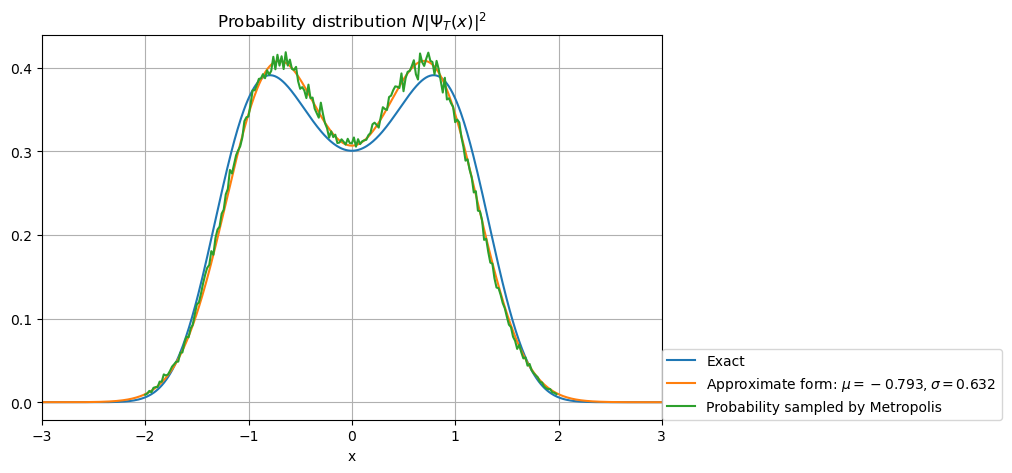

In [16]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

approx = norm_density(x, mu, sigma)
# Plot a few things
plt.figure(figsize=(8,5))
#scale = 0.3
#plt.plot(x, scale*V, color="Orange", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="Exact")
plt.plot(x, approx, label=f"Approximate form: $\mu ={format(mu, '.3f')}, \sigma={format(sigma, '.3f')}$")
x_simul, data_simul = np.loadtxt("OPTIMIZED/distribution.dat", usecols=(0, 1), skiprows=1, unpack=True)
plt.plot(x_simul, data_simul, label="Probability sampled by Metropolis")
plt.title(r"Probability distribution $N|\Psi_T(x)|^2$")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.legend(loc=(1, 0))
plt.show()